<a href="https://colab.research.google.com/github/Khush7860/DL/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression with keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1: Read the dataset


In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

41

In [6]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [7]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


## Seprate X and Y (PE)

In [8]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [9]:
X.head

<bound method NDFrame.head of          AT      V       AP     RH
0      8.34  40.77  1010.84  90.01
1     23.64  58.49  1011.40  74.20
2     29.74  56.90  1007.15  41.91
3     19.07  49.69  1007.22  76.79
4     11.80  40.66  1017.13  97.20
...     ...    ...      ...    ...
9563  15.12  48.92  1011.80  72.93
9564  33.41  77.95  1010.30  59.72
9565  15.99  43.34  1014.20  78.66
9566  17.65  59.87  1018.58  94.65
9567  23.68  51.30  1011.86  71.24

[9527 rows x 4 columns]>

In [10]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4: Preprocess x using pipelines

In [11]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')



In [17]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Apply Train Test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [19]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [20]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [21]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [22]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [23]:
xtrain.shape

(7621, 4)

In [24]:
xtest.shape

(1906, 4)

In [25]:
xtrain.shape[1]

4

## Step 5: Build the neural network

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [27]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [28]:
#Compile the model
model.compile(loss="mse",metrics=["mae"],optimizer="adam")

In [29]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest),epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 4ms/step - loss: 202376.3438 - mae: 449.5469 - val_loss: 193572.2500 - val_mae: 439.6740
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 167247.8906 - mae: 407.7228 - val_loss: 129660.6016 - val_mae: 358.5690
Epoch 3/60
239/239 [==============================] - 1s 5ms/step - loss: 86670.3281 - mae: 284.4315 - val_loss: 47058.9141 - val_mae: 199.9043
Epoch 4/60
239/239 [==============================] - 1s 6ms/step - loss: 30516.5391 - mae: 150.8863 - val_loss: 20305.1836 - val_mae: 120.1772
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 17907.0195 - mae: 113.5059 - val_loss: 14958.2451 - val_mae: 103.9376
Epoch 6/60
239/239 [==============================] - 1s 3ms/step - loss: 13124.5713 - mae: 97.5317 - val_loss: 10667.2549 - val_mae: 88.1607
Epoch 7/60
239/239 [==============================] - 1s 3ms/step - loss: 8968.4219 - mae: 80.8460 - val_loss: 6948.3125 - val_mae: 71

In [30]:
hist.history["loss"]

[202376.34375,
 167247.890625,
 86670.328125,
 30516.5390625,
 17907.01953125,
 13124.5712890625,
 8968.421875,
 5580.3876953125,
 3198.724853515625,
 1748.577880859375,
 976.3026733398438,
 594.6666870117188,
 395.8284606933594,
 280.9723205566406,
 206.96707153320312,
 156.66331481933594,
 121.64027404785156,
 96.79713439941406,
 78.91181945800781,
 65.8969955444336,
 55.78469467163086,
 47.78422927856445,
 41.49601364135742,
 36.78427505493164,
 32.97272872924805,
 30.182174682617188,
 27.94056510925293,
 26.158283233642578,
 24.93462562561035,
 23.91132164001465,
 23.28949546813965,
 22.70960807800293,
 22.380878448486328,
 21.969606399536133,
 21.700042724609375,
 21.48616600036621,
 21.328441619873047,
 21.273576736450195,
 21.13718605041504,
 21.155126571655273,
 20.989839553833008,
 20.798316955566406,
 20.86370849609375,
 20.865018844604492,
 20.713438034057617,
 20.612340927124023,
 20.65498161315918,
 20.57080078125,
 20.71148681640625,
 20.789894104003906,
 20.6941566467285

In [31]:
hist.history['val_loss']

[193572.25,
 129660.6015625,
 47058.9140625,
 20305.18359375,
 14958.2451171875,
 10667.2548828125,
 6948.3125,
 4131.22021484375,
 2284.49267578125,
 1247.61376953125,
 720.8272705078125,
 461.17755126953125,
 319.38824462890625,
 228.89366149902344,
 170.65704345703125,
 130.2306365966797,
 102.31859588623047,
 83.08769226074219,
 69.5847396850586,
 58.50895309448242,
 49.8852424621582,
 43.47872543334961,
 38.36626434326172,
 34.3773078918457,
 31.403573989868164,
 28.772619247436523,
 26.959897994995117,
 25.30402946472168,
 24.701379776000977,
 23.5611629486084,
 22.699649810791016,
 22.555124282836914,
 21.878829956054688,
 21.767807006835938,
 21.793140411376953,
 21.392553329467773,
 21.026004791259766,
 20.94346809387207,
 20.677364349365234,
 20.72334098815918,
 20.55292510986328,
 20.52654457092285,
 21.909725189208984,
 20.751380920410156,
 20.691110610961914,
 20.62248420715332,
 20.38587188720703,
 20.69635772705078,
 20.80864906311035,
 21.516178131103516,
 21.4830284118

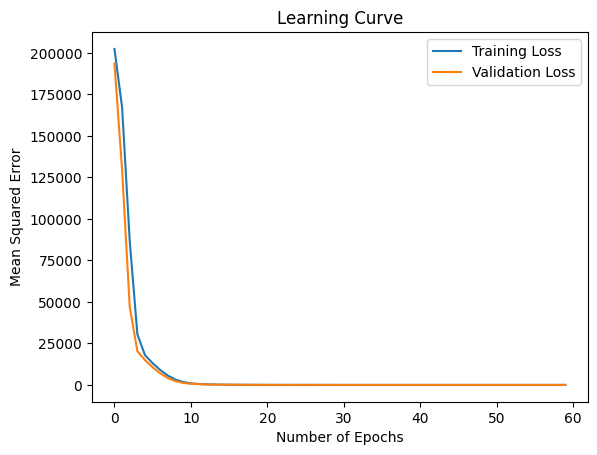

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [33]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 2s 8ms/step - loss: 19.7941 - mae: 3.4968


[19.794063568115234, 3.4968082904815674]

In [34]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.8145 - mae: 3.5265


[19.814516067504883, 3.526546001434326]